<a href="https://colab.research.google.com/github/smatiishin/Data_Science_Project/blob/main/Loan_Data_Project_Final_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install klib

# **This dataset is lending data collected from 2007-2010 from LendingClub.com. Lending Club connects borrowers to loaners. Borrowers must qualify for the Credit Policy in order to recieve a loan**
https://www.kaggle.com/datasets/saramah/loan-data
---



**Initial Goals**


*   **Clean the data** to ensure there are no null values or redundant columns
*   Use a **correlation matrix** to determine which columns best correlate with others
*   This data appears to have a binary type (yes or no) answer for whether the borrower qualifies for the loan. We will model our data using **Logistic Regression**
*   This data may work with **Random Foresting** but we haven't decided exactly how to optimize it


---






**We begin by importing the necessary libraries and classes**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import files
import klib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
from sklearn import preprocessing

uploaded = files.upload()

Saving loan_data.csv to loan_data (2).csv


**Check the first 10 rows of the loan dataset**

---



In [ ]:
loan_data = pd.read_csv("./loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Evaluate the number of rows in the dataset before we make changes to it**

---



In [ ]:
# Show the original number of datasets before modification
print("# of samples in original dataset: " +str(len(loan_data.index)))

# of samples in original dataset: 9578


# **Initially Cleaning the Data**

---



**Our goal here is to remove redundant columns and remove rows with a null value**

---



**We make a copy of the data as to not alter the original data**

---



In [ ]:
# First we make a copy of the data as to not alter the original data
data_clean = loan_data.copy()

**First and formost, we condensed the data to remove redundant and irrelevant columns**

---



In [ ]:
# Since since revol util already exsits, we drop revol bal and other columns that are irrelevant
data_clean.drop(['revol.bal', 'delinq.2yrs', 'pub.rec'], axis=1, inplace=True)

**Here is our updated dataset**

---



In [ ]:
data_clean.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,39.5,0,0


**We check to see how many null values appear in each column**

---



In [ ]:
# Check the number of null values in each column
data_clean.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.util           0
inq.last.6mths       0
not.fully.paid       0
dtype: int64

**We see that this dataset does not contain any null values, and we confirm it here**

---



In [ ]:
klib.missingval_plot(data_clean)

No missing values found in the dataset.


**We proceed to clean our data for the first time**

---



In [ ]:
# We proceed in cleaning the data
data_clean = klib.data_cleaning(data_clean)

Shape of cleaned data: (9578, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.49 MB (-61.25%)



**After cleaning the data, no rows or columns were removed. Not really sure where the reduced memory is coming from**

---



**We now check some histograms of our data to determine binary columns for the models**

---



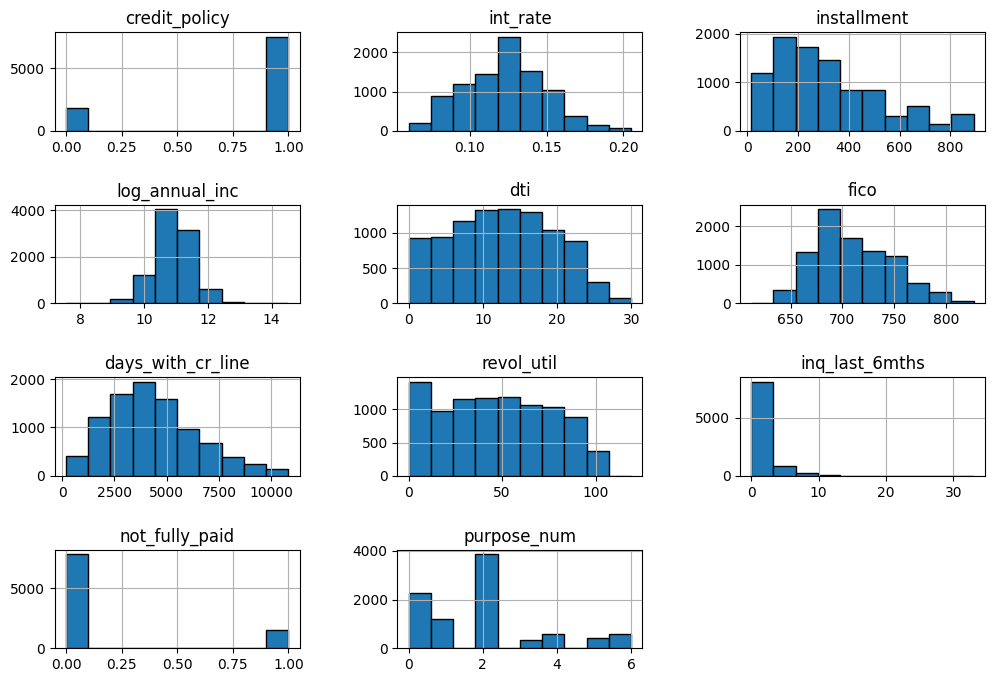

In [ ]:
#Let's look at some histograms from our data
data_clean.hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.subplots_adjust(hspace=0.75, wspace=0.4)

**Observations:**
*   We noticed **two main binary columns**: **credit_policy** and **not_fully_paid**. We will use these later in our **Logistic Regression** and **Random Foresting**
*   The columns **days_with_cr_line, int_rate, installment, and dti** appear to have some distant **upper outliers**, and **fico** has an unusual **lower outlier** so we will attempt to get rid of some of those to make our data more predictable

---





Matt Sand has a function that I wish to borrow to modify the days_with_cr_line, int_rate, fico, installment, revol_util, and dti columns: https://github.com/msaad02/final-project-data-sci/blob/main/used-car-prices.ipynb

---



In [ ]:
# First we collect the data in the columns
columns0 = pd.Series(['days_with_cr_line','int_rate', 'fico', 'installment', 'dti'])
origLen0 = len(data_clean)

for column in columns0:

  # Find the first and third quartile for IQR
  q1_0 = np.percentile(data_clean[column], 25)
  q3_0 = np.percentile(data_clean[column], 75)

  # Find IQR and the upper/lower limit
  iqr = (q3_0 - q1_0)
  upperLimit = q3_0 + iqr * 1.75  # The 'magic number' basically increases the IQR so we are not cutting off too much data and is subject to change
  lowerLimit = q1_0 - iqr * 1.50

  # Modifies the dataset to not contain outliers
  data_clean = data_clean.drop(data_clean[(data_clean[column] > upperLimit) | (data_clean[column] < lowerLimit)].index)

# Calculate the number of rows remaining after updating the dataset
afterLen0 = len(data_clean)
print(origLen0-afterLen0, 'outlier rows have been removed')

301 outlier rows have been removed


Next, we transform a qualitative column to a quantitative column: '**purpose**', using a function called LabelEncoder: https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets'

---



In [ ]:
# Instantiate LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Fit and transform the 'purpose' column
data_clean['purpose_num'] = label_encoder.fit_transform(data_clean['purpose'])
data_clean.drop(['purpose'], axis=1, inplace=True)
data_clean.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_util,inq_last_6mths,not_fully_paid,purpose_num
0,1,0.1189,829.099976,11.350407,19.48,737,5639.958333,52.099998,0,0,2
1,1,0.1071,228.220001,11.082143,14.29,707,2760.000000,76.699997,0,0,1
2,1,0.1357,366.859985,10.373491,11.63,682,4710.000000,25.600000,1,0,2
3,1,0.1008,162.339996,11.350407,8.10,712,2699.958333,73.199997,1,0,2
4,1,0.1426,102.919998,11.299732,14.97,667,4066.000000,39.500000,0,0,1


**Now we have taken care of some of the significant outliers, so we begin to observe any correlations**

---



# **Correlation Matrix**

---



**We first generated a standard correlation matrix**

---



In [ ]:
klib.corr_mat(data_clean)

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_util,inq_last_6mths,not_fully_paid,purpose_num
credit_policy,1.00,-0.29,0.07,0.04,-0.09,0.35,0.12,-0.10,-0.53,-0.16,0.02
int_rate,-0.29,1.00,0.26,0.04,0.22,-0.72,-0.13,0.47,0.19,0.15,0.11
installment,0.07,0.26,1.00,0.44,0.05,0.09,0.20,0.08,-0.02,0.04,0.15
log_annual_inc,0.04,0.04,0.44,1.00,-0.06,0.11,0.37,0.06,0.02,-0.04,0.09
dti,-0.09,0.22,0.05,-0.06,1.00,-0.24,0.08,0.33,0.03,0.04,-0.05
fico,0.35,-0.72,0.09,0.11,-0.24,1.00,0.25,-0.54,-0.19,-0.15,0.06
days_with_cr_line,0.12,-0.13,0.20,0.37,0.08,0.25,1.00,0.00,-0.05,-0.03,0.05
revol_util,-0.10,0.47,0.08,0.06,0.33,-0.54,0.00,1.00,-0.02,0.08,-0.06
inq_last_6mths,-0.53,0.19,-0.02,0.02,0.03,-0.19,-0.05,-0.02,1.00,0.15,0.03
not_fully_paid,-0.16,0.15,0.04,-0.04,0.04,-0.15,-0.03,0.08,0.15,1.00,0.05


**We create a visual representation of the correlation matrix on the column: credit_policy (What best correlates to a borrower qualifying?)**

---



<Axes: title={'center': 'Feature-correlation (pearson)'}>

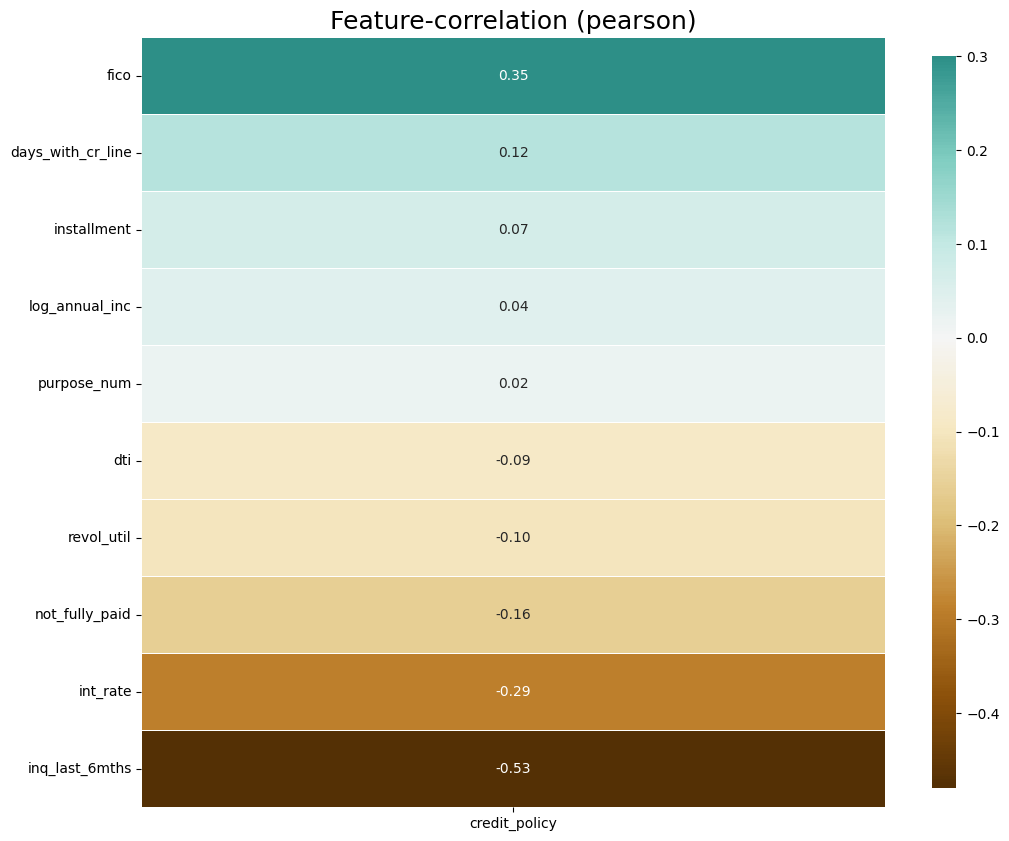

In [ ]:
klib.corr_plot(data_clean, target='credit_policy')

It is clear that **FICO score** and **Days with Credit Line** are the main signficant positive correlations

---



**Now we create a visual representation of the correlation matrix on the column: not_fully_paid (What best correlates to a borrower not fully repaying their debts?)**

<Axes: title={'center': 'Feature-correlation (pearson)'}>

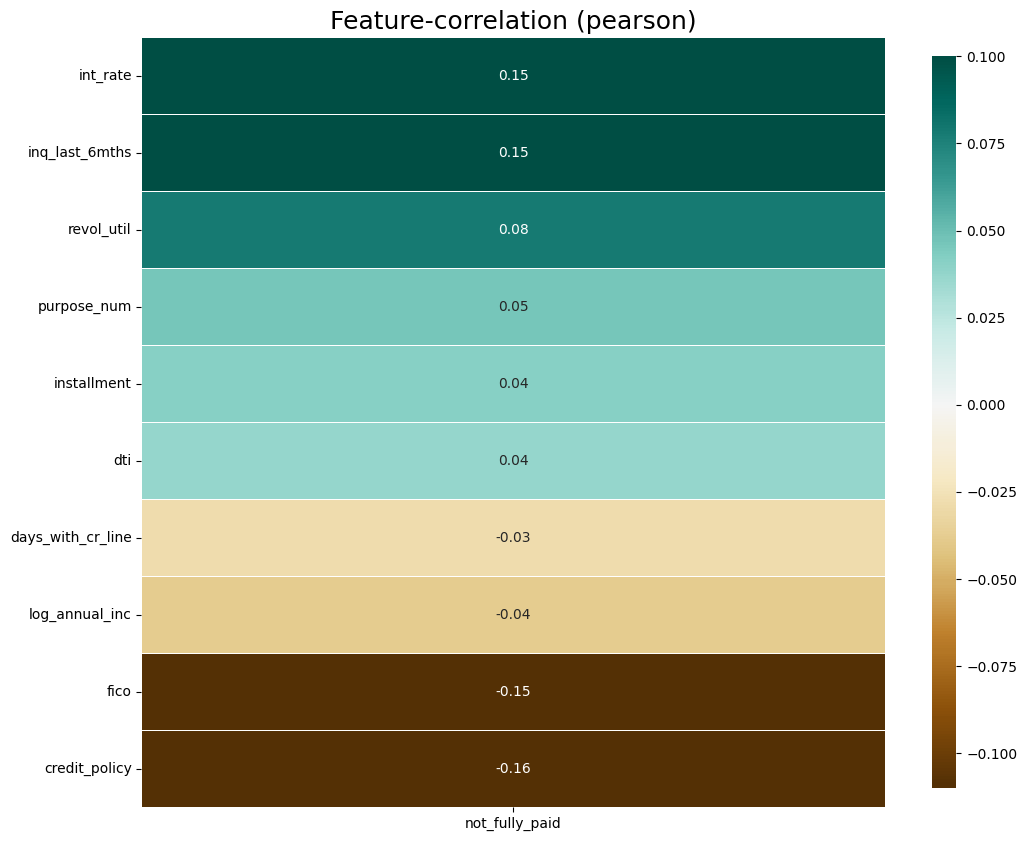

In [ ]:
klib.corr_plot(data_clean, target='not_fully_paid')

It is evident that **interest rate**, **revolving utilization** (compares your credit debt to your credit limit), and **inquriy last 6 months** positively correlate with a borrower being in debt.

---



# **1a) Logistic Regression on credit policy**



**We perform Logistic Regression on Credit Policy**

---



In [ ]:
# Define a dependent variable and independent variable using approval or rejection of credit policy by loaners
x_1a = data_clean.drop('credit_policy',axis=1)
y_1a = data_clean['credit_policy']

# We will divide the data in a 70/30 ratio and ensure that it takes the same sample everytime
x_train_1a, x_test_1a, y_train_1a, y_test_1a = train_test_split(x_1a, y_1a, test_size=0.25, shuffle=True)

In [ ]:
# Set a variable for a Logistic Regression, initialize the model, and predict the values
logmodel = LogisticRegression()

logmodel.fit(x_train_1a, y_train_1a)

predictions_1a = logmodel.predict(x_test_1a)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the accuracy of the test data compared to predicted data
print('Accuracy Score:', accuracy_score(y_test_1a, predictions_1a) * 100)

Accuracy Score: 89.3103448275862


Running **Logistic Regression** on credit policy, we recieved an **89.3**% model accuracy which is pretty good.

---

Let's visualize the **confusion matrix** of the model

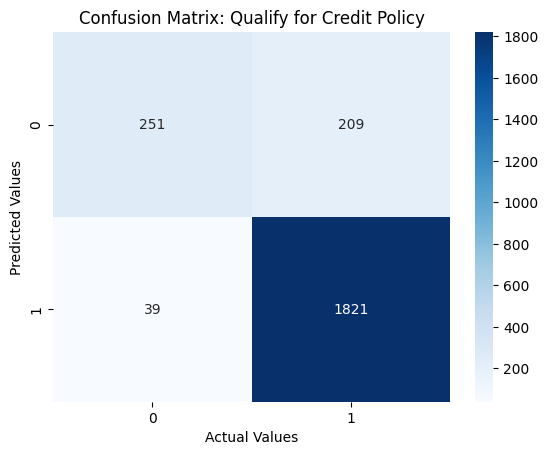

In [ ]:
# Visualize the confusion matrix
y_pred_1a = predictions_1a
sns.heatmap(confusion_matrix(y_test_1a, y_pred_1a), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix: Qualify for Credit Policy')
plt.show()

Our sample predicted a lot more True Positives than any other outcome. The reason this may be is because the dataset has many more borrowers who qualify than who don't, and we observe this below

---



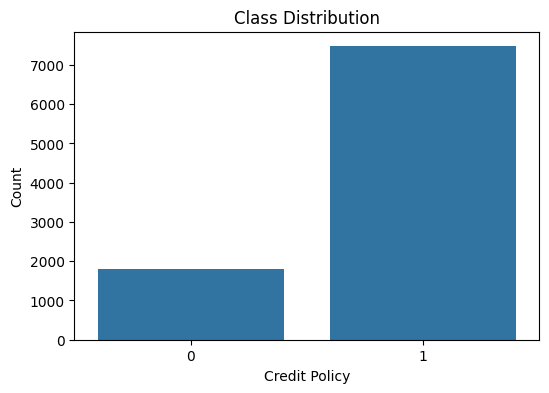

In [ ]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_policy', data=data_clean)
plt.title('Class Distribution')
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check class distribution of Credit Policy
print(pd.Series(y_1a).value_counts())

credit_policy
1    7474
0    1803
Name: count, dtype: int64


Maybe there is a way to synthesize more datapoints and a more equal dataset may improve predictability?

---



# **1aa) SMOTE (K-Nearest-Neighbor) --> Oversampling**

I will attempt to use a technique called **Synthetic Minority Oversampling Technique** (SMOTE). It basically **creates synthetic datasets for the minority class** by oversampling, in this case, those who **do not qualify for the credit policy** by using a K-Nearest-Neighbor Algorithm https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

---



In [ ]:
# Create synthetic data to even out the samples for credit_policy
x_1ax = data_clean.drop('credit_policy', axis=1)
y_1ax = data_clean['credit_policy']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(x_1ax, y_1ax)

# Check class distribution after resampling
print(pd.Series(y_resampled).value_counts())

credit_policy
1    7474
0    7474
Name: count, dtype: int64


Now we have an **equal number of samples** for both the borrowers who qualify and those who dont (**7474 samples each**)

---

Now we show the differences in the **synthetic data** compared to the **original data** by **plotting them side by side** on the columns 'days_with_cr_line' and 'fico'

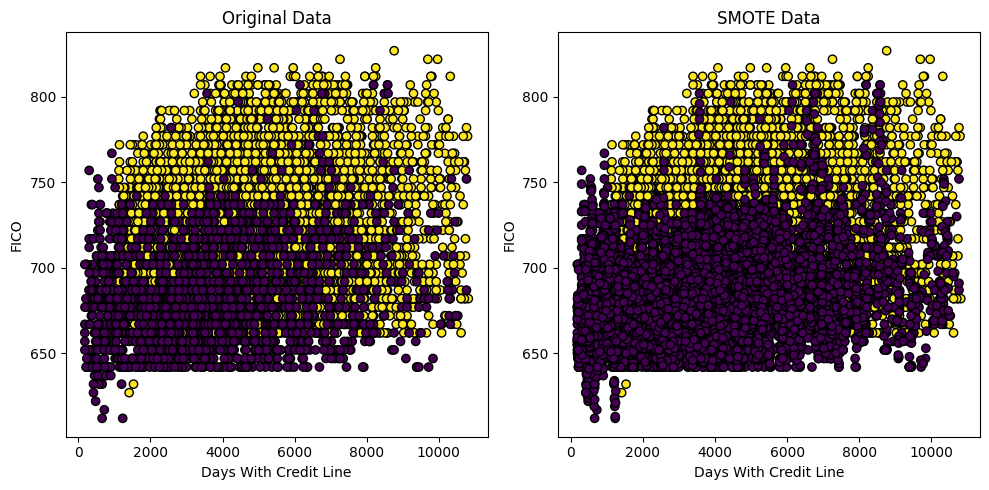

In [ ]:
# Plotting the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_1ax['days_with_cr_line'], x_1ax['fico'], c=y_1ax, cmap='viridis', edgecolor='k')
plt.title('Original Data')
plt.xlabel('Days With Credit Line')
plt.ylabel('FICO')

# Plotting the SMOTE-generated data
plt.subplot(1, 2, 2)
plt.scatter(X_resampled['days_with_cr_line'], X_resampled['fico'], c=y_resampled, cmap='viridis', edgecolor='k')
plt.title('SMOTE Data')
plt.xlabel('Days With Credit Line')
plt.ylabel('FICO')

plt.tight_layout()
plt.show()

After about 6,000 days with credit line, we can see the clustering more clearly.

---



Now, let's run **Logistic Regression** on the **synthetic data** for **credit policy**

---



In [ ]:
# Define a dependent variable and independent variable of the SMOTE data
x_SMOTE = X_resampled
y_SMOTE = y_resampled

# We will divide the SMOTE data in a 70/30 ratio and ensure that it takes the same sample everytime
x_train_SMOTE, x_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(x_SMOTE, y_SMOTE, test_size=0.30, shuffle=True)

In [ ]:
# Set a variable for a Logistic Regression and initialize the model for the SMOTE data
logmodel = LogisticRegression()

logmodel.fit(x_train_SMOTE, y_train_SMOTE)

predictions_SMOTE = logmodel.predict(x_test_SMOTE)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the accuracy of the SMOTE data
print('Accuracy Score:', accuracy_score(y_test_SMOTE, predictions_SMOTE) * 100)

Accuracy Score: 79.01895206243033


We went from 89.3% in our original model to **79.0**% in the synthetic model. Clearly the oversampling idea is not ideal but it is promising with some optimization

---
A view of the **confusion matrix** of the **SMOTE data**


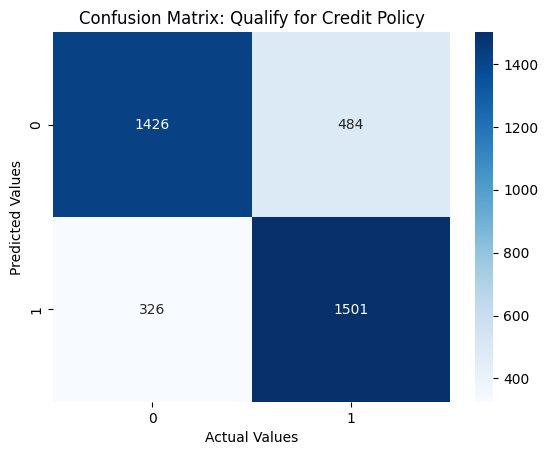

In [ ]:
# Visualize the confusion matrix
y_pred_SMOTE = predictions_SMOTE
sns.heatmap(confusion_matrix(y_test_SMOTE, y_pred_SMOTE), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix: Qualify for Credit Policy')
plt.show()

# **1ab)  Undersampling**

This time we try to decrease the samples of the majority class to match the minority class aka **undersampling**, in the case, borrowers who qualify and see if this improves our results

---



In [ ]:
# Create synthetic data to balance the samples for credit_policy
x_1axx = data_clean.drop('credit_policy', axis=1)
y_1axx = data_clean['credit_policy']

# Apply RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(random_state=1)
Xx_resampled, yy_resampled = undersampler.fit_resample(x_1axx, y_1axx)

# Check class distribution after undersampling
print(pd.Series(yy_resampled).value_counts())

credit_policy
0    1803
1    1803
Name: count, dtype: int64


Now we have an **equal sample** to match the minority class of **1803 samples** for each class

---

Now we show the differences in the **undersampled data** compared to the **original data** by plotting them side by side on the columns 'days_with_cr_line' and 'fico'

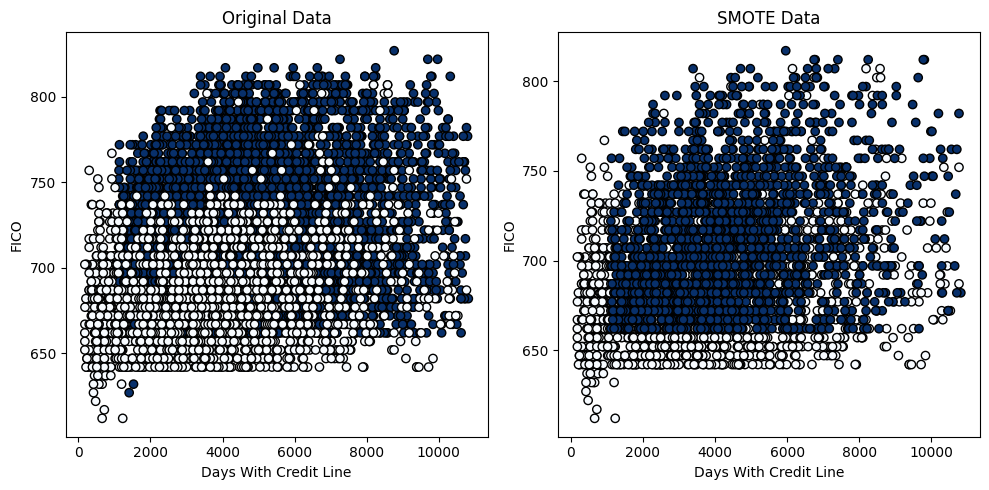

In [ ]:
# Plotting the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_1axx['days_with_cr_line'], x_1axx['fico'], c=y_1axx, cmap='Blues', edgecolor='k')
plt.title('Original Data')
plt.xlabel('Days With Credit Line')
plt.ylabel('FICO')

# Plotting the SMOTE-generated data
plt.subplot(1, 2, 2)
plt.scatter(Xx_resampled['days_with_cr_line'], Xx_resampled['fico'], c=yy_resampled, cmap='Blues', edgecolor='k')
plt.title('SMOTE Data')
plt.xlabel('Days With Credit Line')
plt.ylabel('FICO')

plt.tight_layout()
plt.show()

We can see clearly how the majority class (borrowers who qualify) are now equal with the minority class (borrowers who don't qualify)

We run **Logistic Regression** on the **undersampled dataset** for **Credit Policy**

---



In [ ]:
# Define a dependent variable and independent variable of the undersampled data
x_under = Xx_resampled
y_under = yy_resampled

# We will divide the SMOTE data in a 70/30 ratio and ensure that it takes the same sample everytime
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=0.25, shuffle=True)

In [ ]:
# Initialize the model for the SMOTE data
logmodel.fit(x_train_under, y_train_under)

predictions_under = logmodel.predict(x_test_under)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the accuracy of the undersampled SMOTE data
print('Accuracy Score', accuracy_score(y_test_under, predictions_under)* 100)

Accuracy Score 79.49002217294901


With a Logistic Regression predictability of **79.4**% for undersampling, we get very similar results to oversampling using SMOTE which is good and possibly great with more time to optimize

---



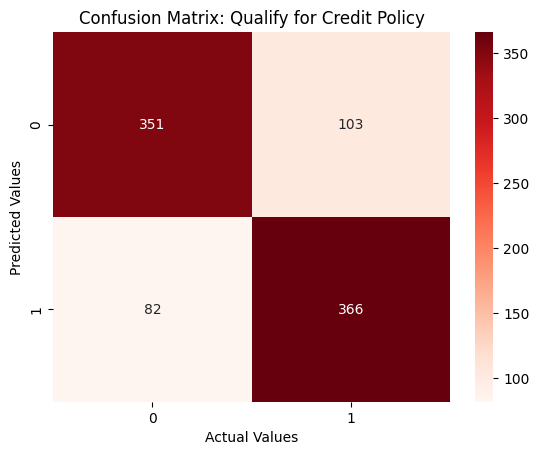

In [ ]:
# Visualize the confusion matrix
y_pred_under = predictions_under
sns.heatmap(confusion_matrix(y_test_under, y_pred_under), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix: Qualify for Credit Policy')
plt.show()

**Final observation for 1a**: Logistic Regression performs considerably well using Credit Policy as the 'y' variable. Although not optimized, it is evident that when the **two classes are equal** (Borrowers who qualify and borrowers who don't), the model is able to predict **close to 80%** of the data whether oversampling or undersampling and on the **original dataset close to 90%**. Givem more time, these models can most definitely be tweaked for improvements

---



# **1b) Logistic Regression on debts not fully paid**



**We perform Logistic Regression on debts not fully paid**

---



In [ ]:
# Define a dependent variable and independent variable using not_fully_paid
x_1b = data_clean.drop('not_fully_paid',axis=1)
y_1b = data_clean['not_fully_paid']

# We will divide the data in a 70/30 ratio and ensure that it takes the same sample everytime
x_train_1b, x_test_1b, y_train_1b, y_test_1b = train_test_split(x_1b, y_1b, test_size=0.25, shuffle=True) # 81

In [ ]:
# Initialize the model and predict the values
logmodel.fit(x_train_1b, y_train_1b)

predictions_1b = logmodel.predict(x_test_1b)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the accuracy of the test data compared to predicted data
print('Accuracy Score:',accuracy_score(y_test_1b, predictions_1b) * 100)

Accuracy Score: 84.22413793103448


Running **Logistic Regression** on debt not fully paid, we recieved an **84.2**% model accuracy which is great but slightly worse than credit policy (89.3%)

---

A view of the **confusion matrix** for **debts not fully paid**

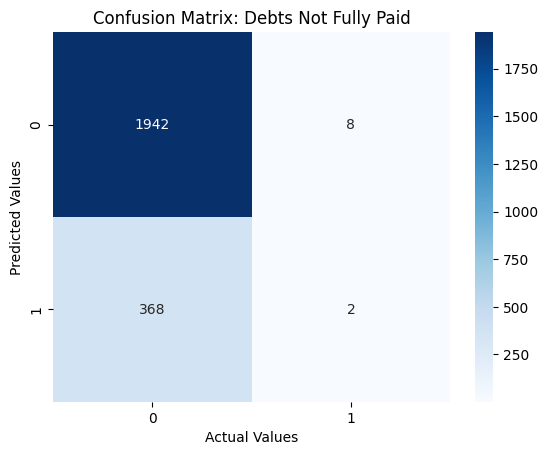

In [ ]:
# Visualize the confusion matrix
y_pred_1b = predictions_1b
sns.heatmap(confusion_matrix(y_test_1b, y_pred_1b), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix: Debts Not Fully Paid')
plt.show()

We actually see a **very imbalanced sampling** and how it is **skewing the model**. We will try again to perform **SMOTE** on **debts not fully paid** to see if this helps

---



# **Model 1ba) SMOTE on not fully paid**

---



In [ ]:
# Create synthetic data to even out the samples for debts not fully paid
x_1bx = data_clean.drop('not_fully_paid', axis=1)
y_1bx = data_clean['not_fully_paid']

# Apply SMOTE for oversampling
smote2 = SMOTE(random_state=1)
X_resampled2, y_resampled2 = smote.fit_resample(x_1bx, y_1bx)

# Check class distribution after resampling
print(pd.Series(y_resampled2).value_counts())

not_fully_paid
0    7797
1    7797
Name: count, dtype: int64


Now we have an **equal number of samples** for both the borrowers who have paid their debts to borrowers who have not paid their debts (**7797 samples each**)

---

A view of the **confusion matrix** for the **SMOTE data** of d**ebts not fully paid**

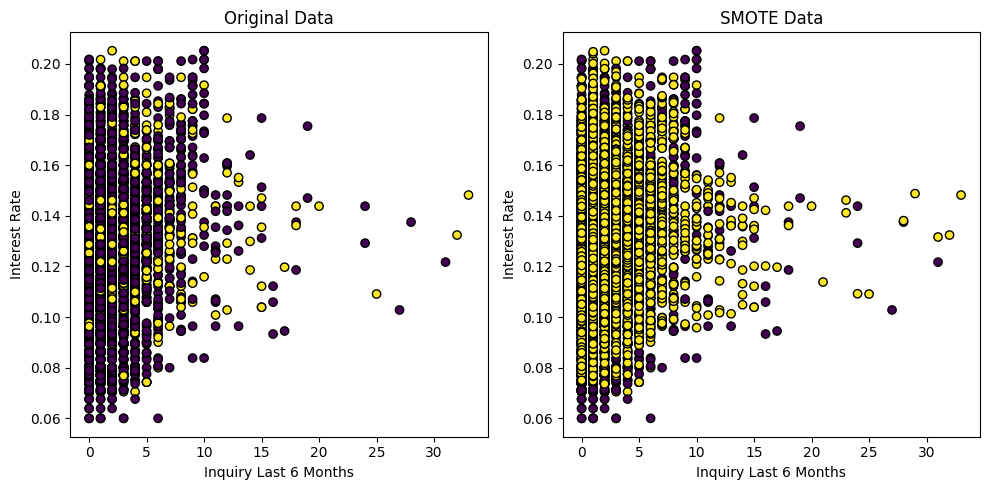

In [ ]:
# Plotting the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_1bx['inq_last_6mths'], x_1bx['int_rate'], c=y_1bx, cmap='viridis', edgecolor='k')
plt.title('Original Data')
plt.xlabel('Inquiry Last 6 Months')
plt.ylabel('Interest Rate')

# Plotting the SMOTE-generated data
plt.subplot(1, 2, 2)
plt.scatter(X_resampled2['inq_last_6mths'], X_resampled2['int_rate'], c=y_resampled2, cmap='viridis', edgecolor='k')
plt.title('SMOTE Data')
plt.xlabel('Inquiry Last 6 Months')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()

We can see how our samples are now equal

---
Run **Logistic Regression** on the **SMOTE data** for **debts not fully paid**

In [ ]:
# Define a dependent variable and independent variable of the SMOTE data
x_SMOTE2 = X_resampled2
y_SMOTE2 = y_resampled2

# We will divide the SMOTE data in a 70/30 ratio and ensure that it takes the same sample everytime
x_train_SMOTE2, x_test_SMOTE2, y_train_SMOTE2, y_test_SMOTE2 = train_test_split(x_SMOTE2, y_SMOTE2, test_size=0.30, shuffle=True)

In [ ]:
# Set a variable for a Logistic Regression and initialize the model for the SMOTE data
logmodel = LogisticRegression()

logmodel.fit(x_train_SMOTE2, y_train_SMOTE2)

predictions_SMOTE2 = logmodel.predict(x_test_SMOTE2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the accuracy of the SMOTE data
print('Accuracy Score:', accuracy_score(y_test_SMOTE2, predictions_SMOTE2) * 100)

Accuracy Score: 64.22312459927335


Unfortunately it appears that **SMOTE made the model predictability worse** by synthesizing datapoints for the minority class

---
A view of the **confusion matrix** for the **SMOTE data** of **debts not fully paid**

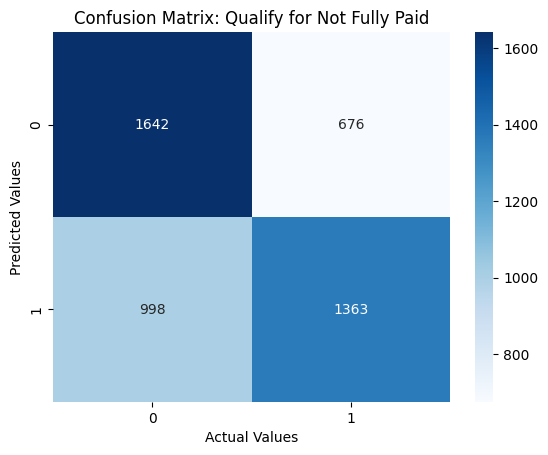

In [ ]:
# Visualize the confusion matrix
y_pred_SMOTE2 = predictions_SMOTE2
sns.heatmap(confusion_matrix(y_test_SMOTE2, y_pred_SMOTE2), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix: Qualify for Not Fully Paid')
plt.show()

**Final observation for 1b**: The **correlation between debts not fully paid is not as strong as credit policy** and the SMOTE data of debts not fully paid shows that the model predictions were okay but given more time, this can be reevaluated and optimized

---



# **2) Random Forest**

---



First we begin by selecting an **equal number** of samples from **credit_policy**

---



In [ ]:
# Debt Not Fully Paid cases
dfQualified = data_clean[data_clean['credit_policy'] == 1].sample(1000)

# Getting an equivelantly sized sample from the nonFraud cases
dfUnqualified = data_clean[data_clean['credit_policy'] == 0].sample(1000)

# Merging them for test data
df = pd.merge(dfQualified, dfUnqualified, how='outer')

In [ ]:
# Check class distribution after undersampling
print(df['credit_policy'].value_counts())

credit_policy
1    1000
0    1000
Name: count, dtype: int64


Next, we **fit the data** to be prepared for **Random Foresting** and test the accuracy

---



In [ ]:
# Prepare the independent and dependent variables for Random Foresting
x_2 = df.drop('credit_policy', axis=1)
y_2 = df['credit_policy']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.20, random_state=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)

# Train the classifier using the training data
rf_classifier.fit(x_train_2, y_train_2)

y_pred_2 = rf_classifier.predict(x_test_2)

print('Accuracy Score:', accuracy_score(y_test_2, y_pred_2)*100)

Accuracy Score: 95.25


With an accuracy of **95.2%** see that our dataset **performs very well with Random Foresting**

---



I used a source to help **visualize the decision trees** that make up the **Random Forest** model for credit policy. https://mljar.com/blog/visualize-tree-from-random-forest/

---



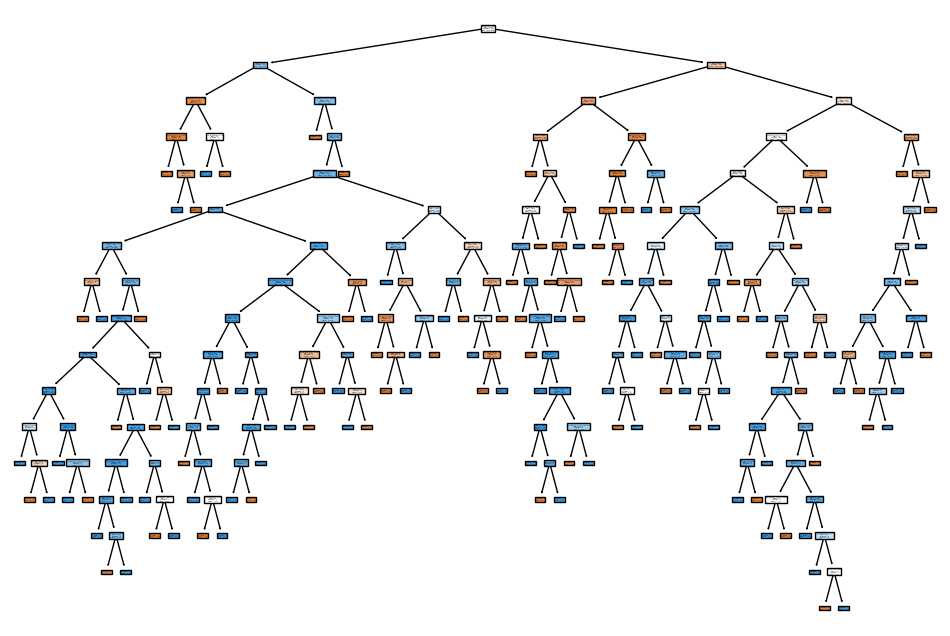

In [ ]:
# Choose an estimator from the Random Forest (e.g., the first tree)
tree_estimator = rf_classifier.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_estimator, feature_names=x_2.columns, filled=True)
plt.show()

If we look at a **more specific decision tree**, we can see how it evaluates the Random Forest model

---



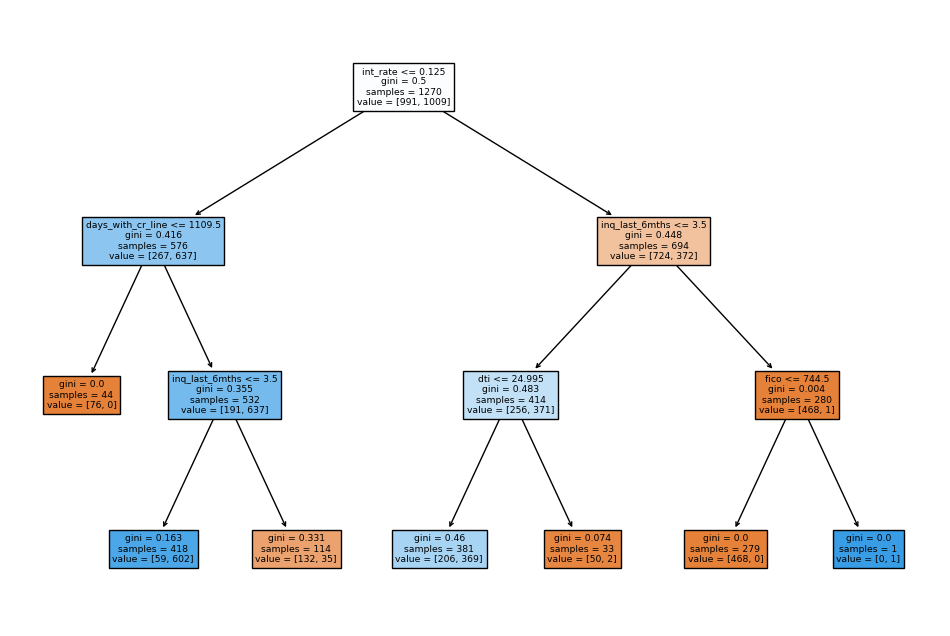

In [ ]:
# Set a variable and fit our model with a max depth of 3
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(x_2, y_2)

# Choose an estimator from the Random Forest (e.g., the first tree)
tree_estimator = rf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_estimator, feature_names=x_2.columns, filled=True)
plt.show()

**Final observation for 2**: **Random Foresting works exceptionally well** under **equal sampling** of the **credit policy**. Still, there is still potential ways to optimize it in future

---



# **Extra**

For fun, we decided to **run all the other models** and see how they performed with **credit policy** as the target variable starting with equal samples

---



In [ ]:
# Qualify for Credit Policy cases
dfQualified2 = data_clean[data_clean['credit_policy'] == 1].sample(1000)

# Getting an equivelantly sized sample from the Nonqualified borrowers cases
dfUnqualified2 = data_clean[data_clean['credit_policy'] == 0].sample(1000)

# Merging them for test data
df = pd.merge(dfQualified2, dfUnqualified2, how='outer')

In [ ]:
# Define the target column(s) and the feature column(s)
x_extra = df.drop('credit_policy', axis=1)
y_extra = df['credit_policy']

# Define the other classifiers
bag = BaggingClassifier()
dtc = DecisionTreeClassifier()
gtc = GradientBoostingClassifier()

# Prepare the training and testing data
x_train_extra, x_test_extra, y_train_extra, y_test_extra = train_test_split(x_extra, y_extra, test_size=0.20, random_state=1)

#Fit all the models
bag.fit(x_train_extra, y_train_extra)
dtc.fit(x_train_extra, y_train_extra)
gtc.fit(x_train_extra, y_train_extra)

# Initialize the predictions for each model
y_pred_extra1 = bag.predict(x_test_extra)
y_pred_extra2 = dtc.predict(x_test_extra)
y_pred_extra3 = gtc.predict(x_test_extra)

# Print all the prediction accuracies for each model
print('Bagging Classifier Accuracy:', accuracy_score(y_test_extra, y_pred_extra1))
print('Decision Tree Classifier Accuracy:', accuracy_score(y_test_extra, y_pred_extra2))
print('Gradient Boosting Classifier Accuracy:', accuracy_score(y_test_extra, y_pred_extra3))

Bagging Classifier Accuracy: 0.9325
Decision Tree Classifier Accuracy: 0.915
Gradient Boosting Classifier Accuracy: 0.95


# **Conclusion**

Out of all the models, we had the least success using Logistic Regression on our dataset. Despite that, Credit policy looked promising using SMOTE, we **did not get an ideal accuracy for the Logistic Regression** model and this is something that we would optimize given more time. **The Random Forest on the Credit Policy yielded very successful results**. **The other models also produced excellent results**.

---

